# 1. Connect to google drive and load neccessary libraries

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 4.2 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 91 kB 8.4 MB/s 
     |████████████████████████████████| 1.1 MB 67.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=0550028c6fb55c1fbe7643a09b921eb01a6bcea987a42ed454590e9a7ca70c80
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=c872e2bcfc2982541a7e5aceedfeeab3ca4b546546e5e0eef9201c6030a2289c
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=ea46aa2cbd30d6249f3dc78dcbbc5eb3abac06e851004f9989f508210108aab2
  Stored in directory: /root/.cache/pi

In [3]:
!pip install pycaret

     |████████████████████████████████| 266 kB 4.2 MB/s 
     |████████████████████████████████| 113 kB 64.4 MB/s 
     |████████████████████████████████| 16.9 MB 86 kB/s 
     |████████████████████████████████| 2.0 MB 48.8 MB/s 
     |████████████████████████████████| 1.7 MB 24.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 1.3 MB 37.3 MB/s 
     |████████████████████████████████| 167 kB 59.7 MB/s 
     |████████████████████████████████| 6.8 MB 53.9 MB/s 
     |████████████████████████████████| 261 kB 60.6 MB/s 
     |████████████████████████████████| 10.1 MB 58.4 MB/s 
     |████████████████████████████████| 303 kB 67.6 MB/s 
     |████████████████████████████████| 62 kB 730 kB/s 
     |████████████████████████████████| 675 kB 28.6 MB/s 
     |██████████████████

In [4]:
from pycaret.utils import version
version()

'2.3.4'

In [5]:
import scanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. load train data

In [6]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_10.zip
  inflating: subset_10.csv           


In [7]:
df = pd.read_csv('subset_10.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM4143684_CACCTTGTCGATCCCT,-0.071988,-0.265577,-0.087526,-0.095535,-0.133205,-0.335218,-0.244682,-0.255132,-0.239429,-0.296508,-0.095936,1.419227,-0.079582,-0.202538,2.275878,-0.944980,-0.332115,-0.295795,-0.322602,-0.078251,-0.251609,-0.450389,-0.280038,-0.208247,1.254934,-0.340695,-0.424307,-0.365255,-0.511625,-0.164532,-0.317861,-0.174058,-0.192115,-0.410630,-0.105355,-0.285387,1.800882,-0.212355,-0.333085,-0.568453,...,2.510091,-0.182170,-0.445091,-0.232213,0.839193,-0.148710,-0.157561,-0.665817,1.627726,2.929252,3.752024,-0.053761,-0.602856,2.797265,-0.548498,-0.963906,-0.304226,-0.226689,-0.224802,-0.181524,-0.120809,0.616167,0.633112,-0.171473,-0.238591,-0.183494,-0.336997,-0.171524,-0.333410,0.066321,-0.284784,-1.236136,-1.140978,0.225116,0.285313,0.404852,-0.403512,-1.331429,macrophage,macrophage
ERS3566166_GTCACGGTCCGGCACA,-0.106635,-0.604680,-0.504235,-0.442228,-0.103701,-0.425101,-0.339960,-0.249205,-0.412101,-0.330718,-0.121260,-0.473610,-0.221898,-0.445567,-0.315318,-1.090314,-0.404402,-0.356656,-0.258395,-0.119093,4.775130,-0.317039,-0.157664,-0.124176,-0.728042,-0.282863,-0.221680,-0.444395,-0.327189,-0.221121,-0.357812,-0.177315,-0.184892,-0.390698,-0.146081,-0.286798,-0.412339,-0.318400,-0.371817,-0.964195,...,-0.193053,-0.098245,-0.309796,-0.272343,-1.405040,-0.187214,-0.236375,-0.031855,-0.739427,-0.392869,-0.328025,-0.149975,-0.545499,-0.278868,-0.161776,0.793728,-0.338451,-0.423338,3.398397,3.837188,-0.225741,1.171086,-0.853118,-0.181345,-0.174656,-0.144594,-0.321012,-0.257268,-0.392649,-1.322311,1.234960,0.850628,0.381848,0.458554,1.284652,0.757548,-2.598698,-0.015576,CD8 effector memory T-cell,T-cell
GSM4143655_CCGGGATTCTACCAGA-2,-0.124044,-0.755008,-0.596920,-0.571494,-0.094010,-0.426885,-0.357217,-0.231042,-0.432728,-0.316848,-0.134548,-0.488330,-0.178900,-0.514463,-0.295380,0.896807,-0.425794,-0.362639,-0.285961,-0.118961,-0.312215,-0.351266,-0.141408,-0.105225,-0.794916,-0.267249,-0.193238,-0.425187,-0.333225,-0.233320,-0.345479,-0.191265,-0.188457,-0.380927,-0.139163,-0.287852,-0.415528,-0.341753,-0.339481,1.249052,...,-0.181909,-0.077890,-0.307268,-0.312375,1.051417,-0.185299,-0.238428,-0.033041,-0.833691,-0.439555,-0.343546,-0.127695,2.437956,-0.261175,4.382756,-1.277835,-0.399502,-0.510792,-0.436643,-0.422582,-0.244247,-0.873464,1.180602,-0.169597,-0.158458,-0.141976,-0.308257,-0.220758,3.579736,-3.214363,-0.142946,0.945928,1.772948,0.503938,-0.872040,-0.466063,0.887722,0.065105,CD8 T-cell (unspecified),T-cell
GSM4143657_CGAATGTAGAGCCTAG,-0.096913,1.311413,-0.358989,0.802298,-0.117326,-0.379667,-0.290580,-0.236730,-0.322928,-0.302283,-0.101962,-0.481266,-0.205666,-0.353486,-0.330180,-1.126939,1.778547,2.101355,-0.348070,-0.093501,-0.266935,1.792534,-0.222964,-0.166076,-0.689498,-0.297045,-0.316700,-0.396968,-0.494939,-0.210438,-0.345373,-0.176377,-0.194003,-0.405211,-0.121287,-0.306903,1.686422,-0.281933,-0.358402,-0.305790,...,-0.349745,-0.152295,-0.411966,-0.285689,-0.095814,-0.160479,-0.196167,-0.492336,-0.631893,-0.305707,-0.394605,-0.122268,-0.572069,-0.266259,-0.411910,-0.005568,1.804333,-0.376868,1.785804,-0.293121,-0.193485,0.049589,1.546430,4.524909,-0.201492,-0.171496,2.289642,3.335222,-0.350693,-0.632696,-0.555727,-0.385962,-0.161600,0.990495,-1.363653,0.636151,0.552661,0.082520,CD8 resident memory T-cell,T-cell
GSM4143657_GATCGATGTGTAACGG,-0.109905,-0.584470,-0.429646,-0.404012,-0.107612

In [8]:
X = df.drop(columns=['cell_state', 'cell_type'])
y = df['cell_state']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
len(y_train.value_counts())

43

In [ ]:
len(y_test.value_counts())

43

# 3. Logistic Regression

## Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.64790549, 0.68277137, 0.63035211, 0.64424056, 0.65241763])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_43classes_unbalanced.sav'
joblib.dump(lr, filename)

['lr_model_43classes_unbalanced.sav']

## Evaluate Model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of Decision Tree model : ', acc_lr)
print('F1 weighted of Decision Tree model : ', f1_lr)
print('F1 macro of Decision Tree model : ', f1_lr_macro)

Accuracy of Decision Tree model :  67.37
F1 weighted of Decision Tree model :  65.27
F1 macro of Decision Tree model :  46.28


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.74      0.89      0.81        80
                    CD4 T-cell (unspecified)       0.00      0.00      0.00        14
                   CD4 central memory T-cell       0.00      0.00      0.00         2
                CD4 follicular helper T-cell       0.85      0.83      0.84        86
             CD4 helper T-cell (unspecified)       0.54      0.72      0.61       121
                            CD4 naive T-cell       0.71      0.78      0.74       161
         CD4 regulatory T-cell (unspecified)       0.88      0.89      0.89       156
                    CD8 T-cell (unspecified)       0.25      0.19      0.21        70
          CD8 activated T-cell (unspecified)       0.63      0.55      0.59        65
                   CD8 central memory T-cell       0.00      0.00      0.00         1
          CD8 cytotoxic T-cell (unspecified)       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 45,  0],
       [ 0,  0,  0, ...,  0,  0,  5]])

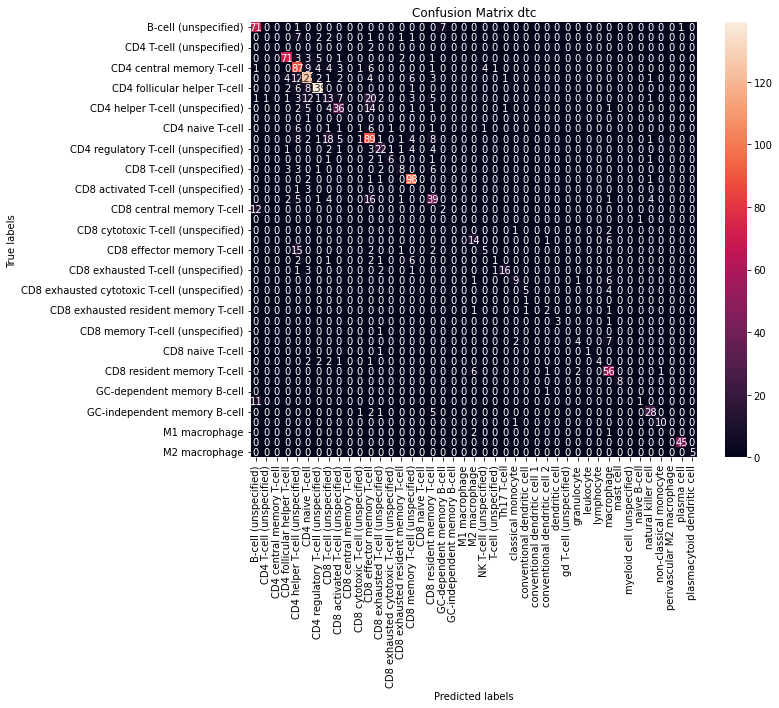

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 4. Predict Test Data (random 30% subset)

## import test data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [ ]:
df = pd.read_csv('subset_30.csv', index_col=0)
df.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2,cell_type_3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell,CD4 T-cell,CD4 regulatory T-cell (unspecified)
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell,CD8 T-cell,CD8 exhausted cytotoxic T-cell (unspecified)
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell,CD4 T-cell,CD4 helper T-cell (unspecified)
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,24926,0.765611
B-cell,2158,0.066284
macrophage,1823,0.055994
plasma cell,885,0.027183
killer cell,756,0.023221
monocyte,655,0.020119
dendritic cell,597,0.018337
lymphocyte,271,0.008324
granulocyte,243,0.007464
mast cell,147,0.004515


## split data

In [ ]:
X_test = df.drop(columns=['cell_state', 'cell_type'])
y_test = df['cell_state']

## predict data

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# load model
import joblib
filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_43classes_unbalanced.sav'
lr = joblib.load(filename)
# result = clf.score(X_test, y_test)
# print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 weighted of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  67.67
F1 weighted of logistic regression model :  65.9
F1 macro of logistic regression model :  47.36


In [ ]:
y_pred

array(['CD4 regulatory T-cell (unspecified)',
       'CD8 resident memory T-cell', 'CD4 helper T-cell (unspecified)',
       ..., 'CD4 regulatory T-cell (unspecified)',
       'CD8 resident memory T-cell', 'CD8 effector memory T-cell'],
      dtype=object)

In [ ]:
pd.DataFrame(y_pred).to_csv('prediction_43classes_unbalanced_subset30.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                              precision    recall  f1-score   support

                        B-cell (unspecified)       0.74      0.91      0.81      1528
                    CD4 T-cell (unspecified)       0.24      0.03      0.05       334
                   CD4 central memory T-cell       0.00      0.00      0.00        30
                CD4 follicular helper T-cell       0.81      0.83      0.82      2067
             CD4 helper T-cell (unspecified)       0.54      0.69      0.61      2371
                            CD4 naive T-cell       0.69      0.80      0.74      3433
         CD4 regulatory T-cell (unspecified)       0.86      0.87      0.86      3420
                    CD8 T-cell (unspecified)       0.32      0.27      0.29      1670
          CD8 activated T-cell (unspecified)       0.60      0.49      0.54      1458
                   CD8 central memory T-cell       0.00      0.00      0.00        17
          CD8 cytotoxic T-cell (unspecified)       0.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1387,    0,    0, ...,    0,   15,    0],
       [   4,   10,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    3,    0,    0],
       [  13,    1,    0, ...,    0,  860,    0],
       [   2,    0,    0, ...,    0,    1,  106]])

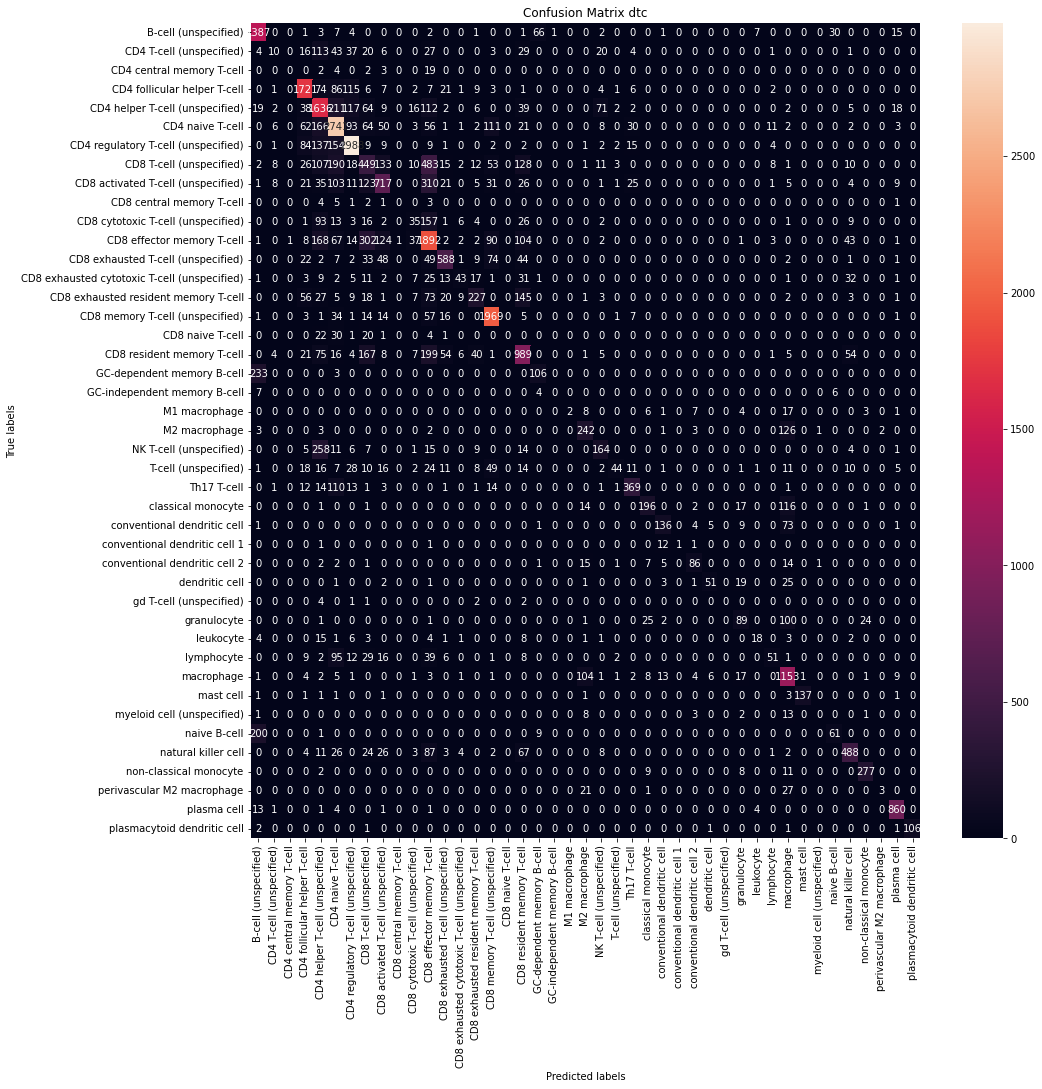

In [ ]:
fig, ax= plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_test)); ax.yaxis.set_ticklabels(np.unique(y_test));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()